In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('multipleChoiceResponses.csv',  encoding="ISO-8859-1", low_memory=False)
df.shape

(16716, 228)

# Basic EDA on Dataset

In [6]:
df.sample(3)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
9011,Male,Israel,22.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8641,Male,Netherlands,39.0,Employed full-time,NaN,NaN,Yes,NaN,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,Male,India,26.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Perfectly,...,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Somewhat important,Not important,Somewhat important


## Select only Relevant Features

In [7]:
null_perc = df.isnull().mean()
null_perc

GenderSelect                      0.005683
Country                           0.007239
Age                               0.019801
EmploymentStatus                  0.000000
StudentStatus                     0.923427
                                    ...   
JobFactorRemote                   0.795166
JobFactorIndustry                 0.796064
JobFactorLeaderReputation         0.796542
JobFactorDiversity                0.796004
JobFactorPublishingOpportunity    0.795166
Length: 228, dtype: float64

In [8]:
relevant_cols = null_perc[null_perc <= 0.5].index
df = df[relevant_cols]
df.shape

(16716, 29)

## Dive Deep into the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GenderSelect                   16621 non-null  object 
 1   Country                        16595 non-null  object 
 2   Age                            16385 non-null  float64
 3   EmploymentStatus               16716 non-null  object 
 4   CodeWriter                     13186 non-null  object 
 5   CurrentJobTitleSelect          11830 non-null  object 
 6   TitleFit                       11504 non-null  object 
 7   CurrentEmployerType            11601 non-null  object 
 8   MLToolNextYearSelect           10998 non-null  object 
 9   MLMethodNextYearSelect         10833 non-null  object 
 10  LanguageRecommendationSelect   10998 non-null  object 
 11  PublicDatasetsSelect           10796 non-null  object 
 12  LearningPlatformSelect         11271 non-null 

In [10]:
df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
count,16385.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000
mean,32.372841,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940
std,10.473487,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Do Univariate analysis to have broad overview of dataset

In [11]:
df.sample(5)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,...,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry
1050,Male,United States,31.0,Employed full-time,Yes,Data Scientist,Fine,Employed by company that makes advanced analyt...,Unix shell / awk,Deep learning,...,20.0,0.0,40.0,40.0,0.0,0.0,"Outlier detection (e.g. Fraud detection),Super...","Bayesian Techniques,Decision Trees - Gradient ...",A bachelor's degree,Technology
4250,Male,Brazil,33.0,Employed full-time,Yes,Software Developer/Software Engineer,NaN,Employed by company that makes advanced analyt...,TensorFlow,Bayesian Methods,...,25.0,25.0,30.0,20.0,0.0,0.0,"Natural Language Processing,Recommendation Eng...","Evolutionary Approaches,Logistic Regression,Ne...",A bachelor's degree,Technology
5359,Female,United Kingdom,51.0,Employed full-time,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15737,Male,United States,30.0,Employed full-time,Yes,Predictive Modeler,Fine,Employed by a company that performs advanced a...,NaN,NaN,...,40.0,0.0,40.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN
9049,Female,Switzerland,30.0,Employed full-time,Yes,Computer Scientist,Fine,NaN,NaN,NaN,...,60.0,20.0,0.0,20.0,0.0,0.0,"Computer Vision,Reinforcement learning,Supervi...","Decision Trees - Gradient Boosted Machines,Dec...",I prefer not to answer,Academic


<Axes: ylabel='CurrentJobTitleSelect'>

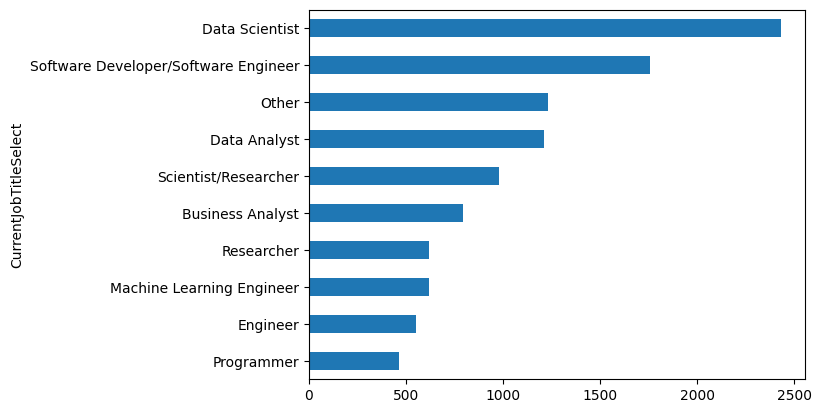

In [12]:
df['CurrentJobTitleSelect'].value_counts().head(10)[::-1].plot(kind='barh')

<Axes: ylabel='MLToolNextYearSelect'>

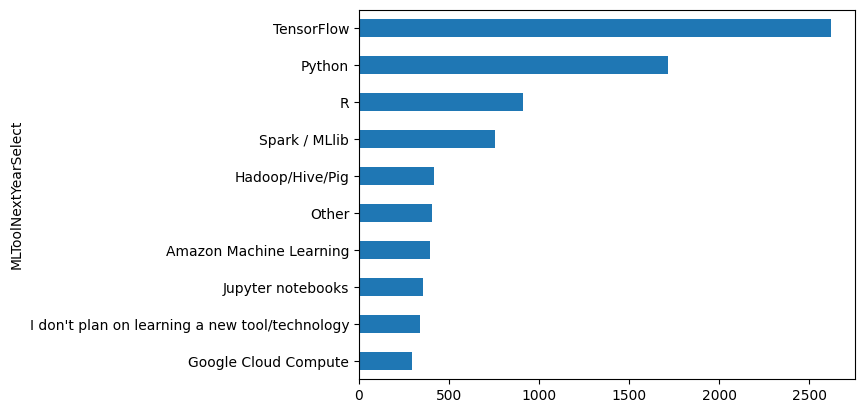

In [13]:
df['MLToolNextYearSelect'].value_counts().head(10)[::-1].plot(kind='barh')

<Axes: ylabel='count'>

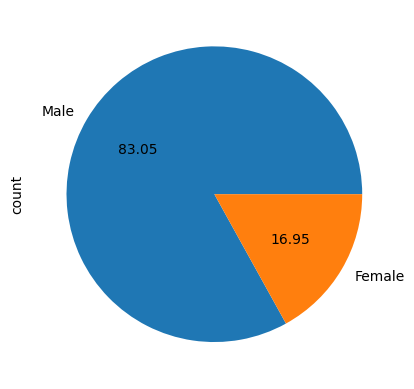

In [14]:
# sns.countplot(df['GenderSelect'])
df['GenderSelect'].value_counts().head(2).plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Country'>

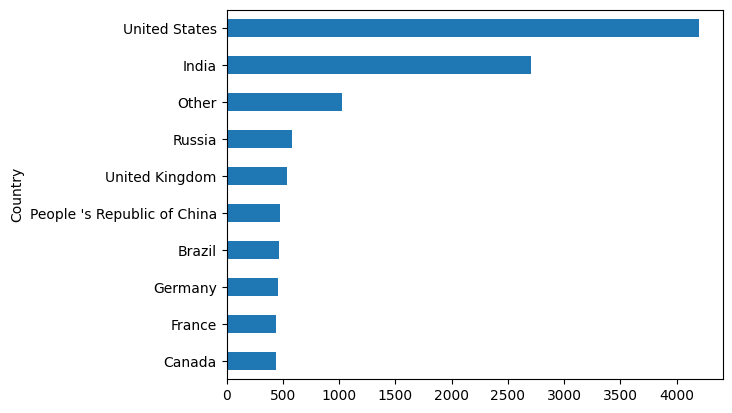

In [15]:
df['Country'].value_counts().head(10)[::-1].plot(kind='barh')

Skewness: 1.3235


<Axes: >

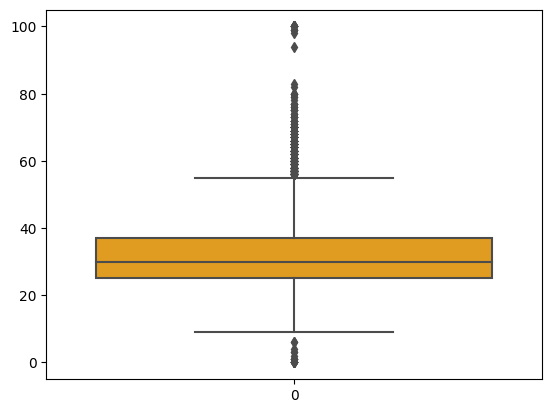

In [16]:
print('Skewness:', round(df['Age'].skew(), 4))
sns.boxplot(df['Age'],color='orange')

# there are just so many outliers in 'Age' column

<Axes: ylabel='LearningPlatformSelect'>

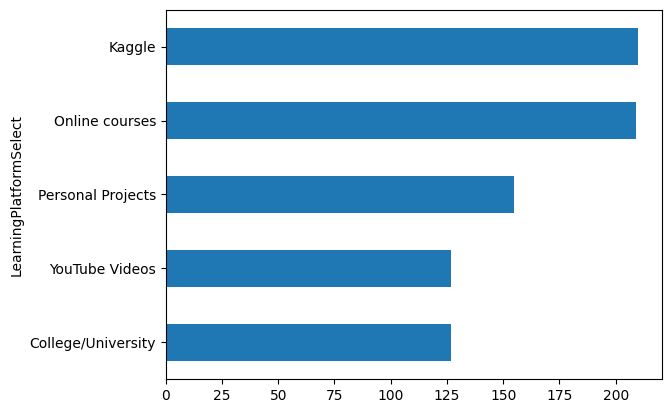

In [17]:
df['LearningPlatformSelect'].value_counts().head(5)[::-1].plot(kind='barh')

<Axes: ylabel='MajorSelect'>

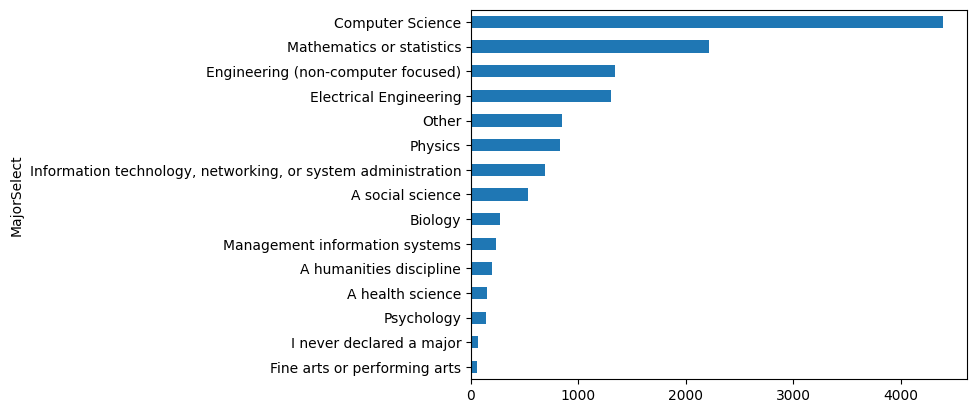

In [18]:
df['MajorSelect'].value_counts().head(15)[::-1].plot(kind='barh')

<Axes: ylabel='EmployerIndustry'>

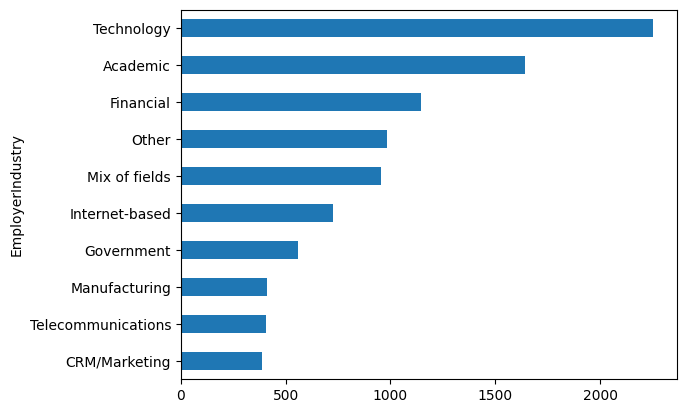

In [19]:
df['EmployerIndustry'].value_counts().head(10)[::-1].plot(kind='barh')

In [20]:
df['MLSkillsSelect'].value_counts().head(15)

MLSkillsSelect
Supervised Machine Learning (Tabular Data)                                                                               1608
Supervised Machine Learning (Tabular Data),Unsupervised Learning                                                          550
Time Series                                                                                                               532
Other (please specify; separate by semi-colon)                                                                            450
Supervised Machine Learning (Tabular Data),Time Series                                                                    446
Computer Vision                                                                                                           439
Supervised Machine Learning (Tabular Data),Time Series,Unsupervised Learning                                              325
Natural Language Processing                                                                            

## **Unfortunately there is no relation between any columns in this dataset to do Multivariate Analysis, So I have gotta stop here 😔**